In [1]:
import scipy
import pandas as pd
import numpy as np

In [2]:
# 创建一个numpy二维数组，对角线为一其余为0
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [3]:
# 将数组转化为csr格式的稀疏矩阵
#只保存非零元素
from scipy import sparse
sparse_matrix = sparse.csc_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


# 稀疏矩阵的格式
### 稀疏矩阵的存储格式往往依赖具体问题中稀疏矩阵的特征，因此其格式比较多。其中一部分是相对简单而又普遍使用的。这篇文章主要介绍常用的COO、CSR、CSC存储格式：

COO, coordinate format.    
CSR, compressed sparse row format.     
CSC, compressed sparse column format.     

## COO

COO格式是将矩阵中的非零元素以坐标的方式存储。例如下面的邻接矩阵，我们可以用两个长度为n的整数数组分别表示行列索引，以及用另一个长度为n的实数数组表示矩阵非零元素。其中n为矩阵中非0元素个数。具体如下图所示：
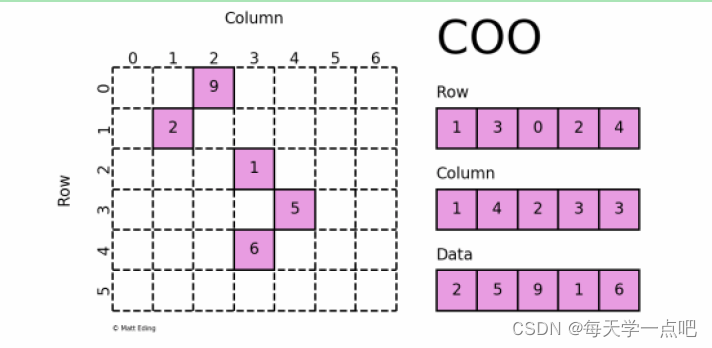


## CSR

对于COO格式的一种改进就是CSR格式，这种格式要求矩阵元按行顺序存储，每一行中的元素可以乱序存储。那么对于每一行，就不需要记录所有元素的行指标。只需要用一个指针表示每一行元素的起始位置即可。以下图为例，具体包含以下数据结构：

Data，用来存储矩阵中的非零元素的值；
Indices，第i个元素记录了Data[i]元素的列数；
Index Pointers, 第i个元素记录了第i行元素在Data数组的起始位置，第i+1个元素为第i行元素在Data数组的终止位置（不包含右边界）。例如第0行元素为Data[0, 2)。
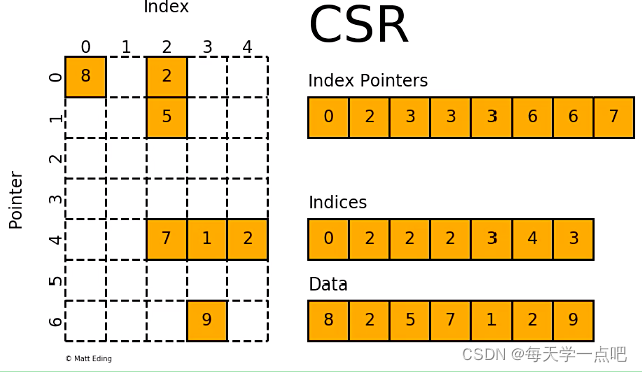

## CSC

CSC是按列来存储一个稀疏矩阵的，其原理与CSC类似。具体包含以下数据结构：

Data，用来存储矩阵中的非零元素的值；
Indices，第i个元素记录了Data[i]元素的行数；
Index Pointers, 第i个元素记录了第i列元素在Data数组的起始位置，第i+1个元素为第i列元素在Data数组的终止位置（不包含右边界）。


In [4]:
# 创建一个coo格式的稀疏矩阵
data = np.ones(4)

In [5]:
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo  = sparse.coo_matrix((data,(row_indices,col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


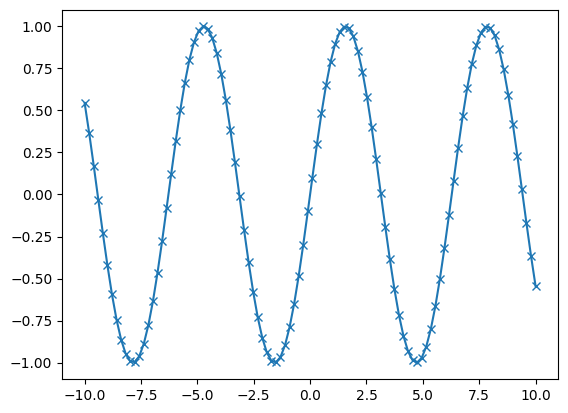

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# 在-10到10之间生成一个数列，共100个数
x = np.linspace(-10,10,100)
# 用正弦函数创建一个数组
y = np.sin(x)
plt.plot(x,y,marker = 'x')

In [7]:
from IPython.display import display
data={'Name':["John","Anna","Peter","Linda"] ,'Location':["New York","London","paris","Berlin"],'Age':[24,13,53,33]}
data_1 = pd.DataFrame(data)
display(data_1)

,Name,Location,Age
0,John,New York,24
1,Anna,London,13
2,Peter,paris,53
3,Linda,Berlin,33


In [8]:
# 选择年龄大于30的行
display(data_1[data_1.Age>30])

,Name,Location,Age
2,Peter,paris,53
3,Linda,Berlin,33


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris['target_names'])
print(iris['feature_names'])
print(iris.data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3

In [10]:
iris.data.shape

(150, 4)

In [11]:
# 0代表 setosa，1代表 versicolor,2代表virginica。
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


D:\python\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


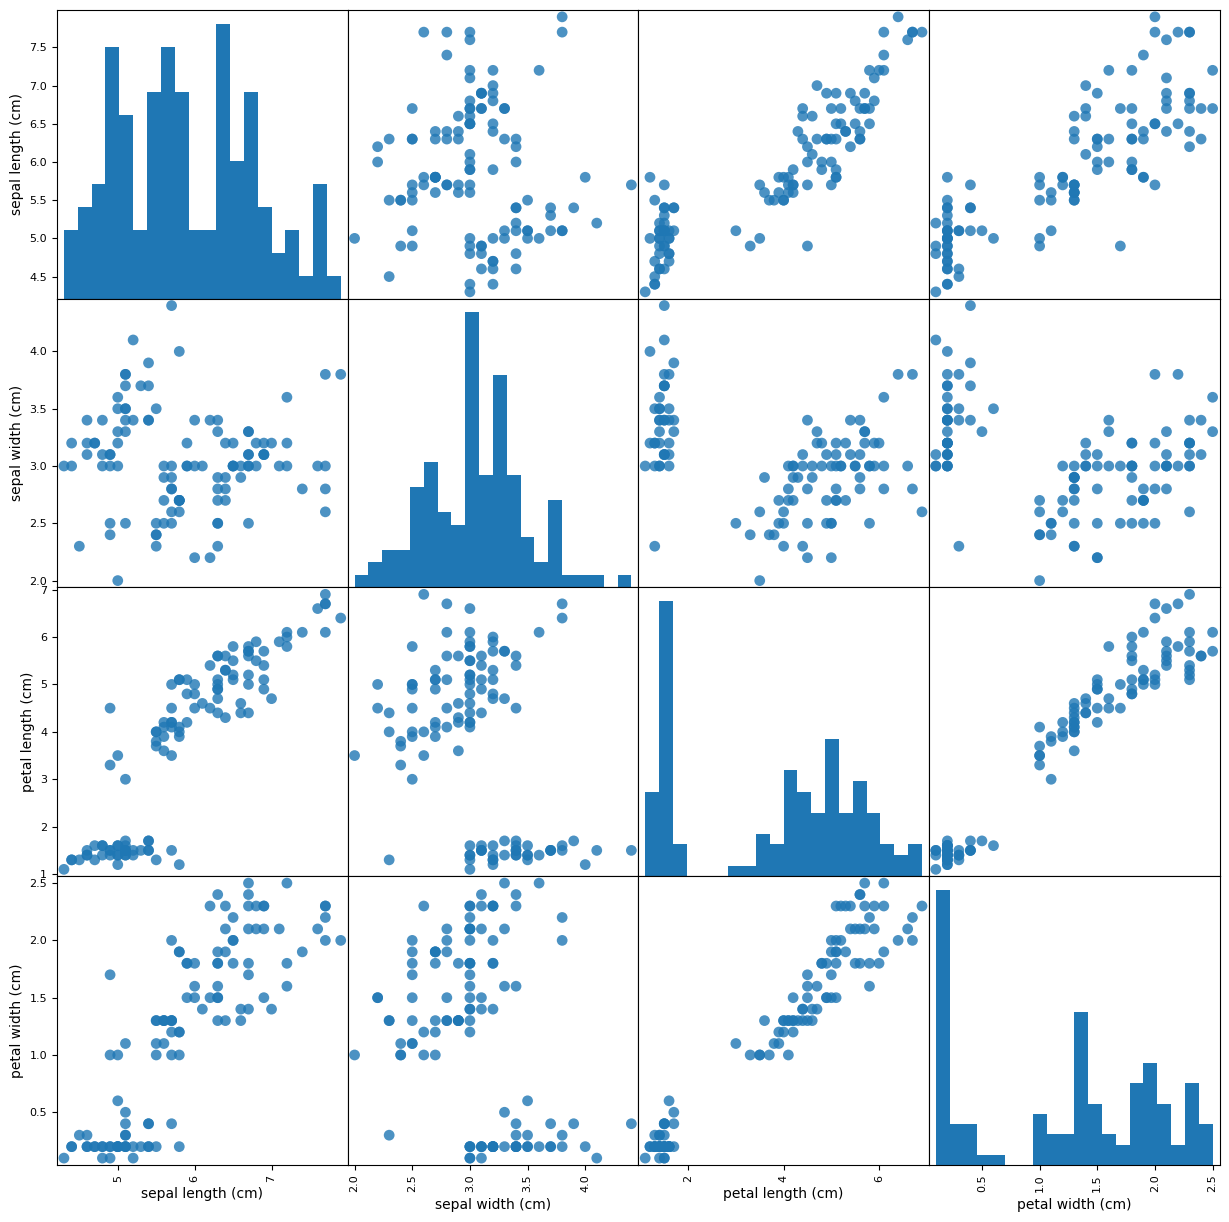

In [14]:
import mglearn
iris_ = pd.DataFrame(X_train,columns=iris.feature_names)
grr = pd.plotting.scatter_matrix(iris_, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
# 实例化对象
knn = KNeighborsRegressor(n_neighbors=1)

In [16]:
# 训练
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [17]:
X_new = np.array([[5,2.9,1,0.2]])

In [18]:
prediction = knn.predict(X_new)
print(prediction)
print(iris['target_names'][prediction.astype(int)])

[0.]
['setosa']


In [19]:
# 评估
pred = knn.predict(X_test)
# 计算正确预测与测试数据集中样本总数的比
knn.score(X_test,y_test)

0.9536585365853658